In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
import zipfile
import os

# Define the path to the zip file and the desired extracted file name
zip_file_path = '/content/train.csv.zip'
extracted_file_name = 'train.csv'

# Check if the extracted file already exists, if not, extract it
if not os.path.exists(f'/content/{extracted_file_name}'):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extract(extracted_file_name, path='/content/') # Extract to /content/ directory

# Now read the csv file
df = pd.read_csv(f"/content/{extracted_file_name}")

X = df.drop('label', axis=1).values
y = df['label'].values

print(X.shape, y.shape)

(42000, 784) (42000,)


In [5]:
# Normalize pixel values
X = X / 255.0

# Reshape to CNN input format
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1)


In [7]:
model = Sequential()

# Convolution Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9887 - val_loss: 0.0403
Epoch 2/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9878 - val_loss: 0.0416
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9909 - loss: 0.0271 - val_accuracy: 0.9887 - val_loss: 0.0417
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9899 - val_loss: 0.0444
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9899 - val_loss: 0.0431
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9922 - loss: 0.0209 - val_accuracy: 0.9896 - val_loss: 0.0400
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9934 - loss: 0.0190 - val_accuracy: 0.9893 - val_loss: 0.0485
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9941 - loss: 0.0192 -

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9888 - loss: 0.0389
Test Accuracy: 0.9901190400123596


In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       816
           1       0.99      1.00      0.99       909
           2       0.99      0.99      0.99       846
           3       0.99      0.99      0.99       937
           4       0.99      0.99      0.99       839
           5       0.99      0.99      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.98      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



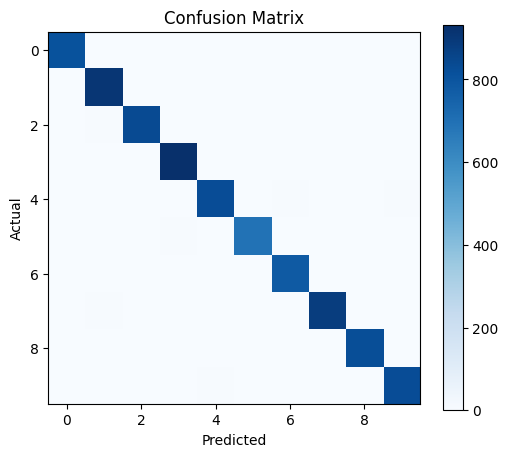

In [13]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

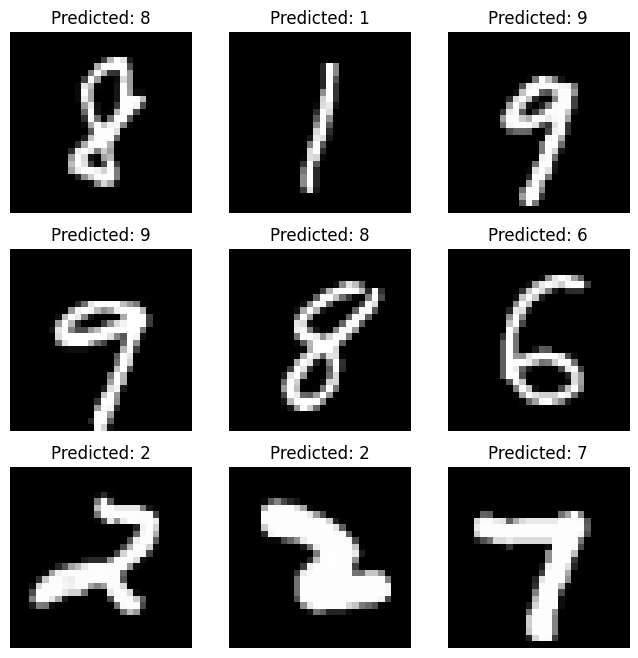

In [14]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()